In [ ]:
file = open("es_ES.txt", encoding="UTF-8")

#importo librerías necesarias

#leo el archivo
#texto = file.read()

#paso a una variable sólo las palabras de las ER
#palabras = texto.split()

#Guardo sólo las palabras
#print("Ingrese la palabra a buscar" )    

#Funcion para recorrer el archivo, buscar y devolver la palabra encontrada
def buscar(palabras):
    for x in palabras:
        palabraEncontrada = palabras
    return palabraEncontrada    

def main(palabras):
    print(("La palabra buscada es: ", ))    
main(palabras);

print(palabras.index("abe"))
print(("La palabra buscada es: ", ))    
print(palabras[palabras.index("abej")])

#vectorizar palabras
#leventaien
#enbeddings


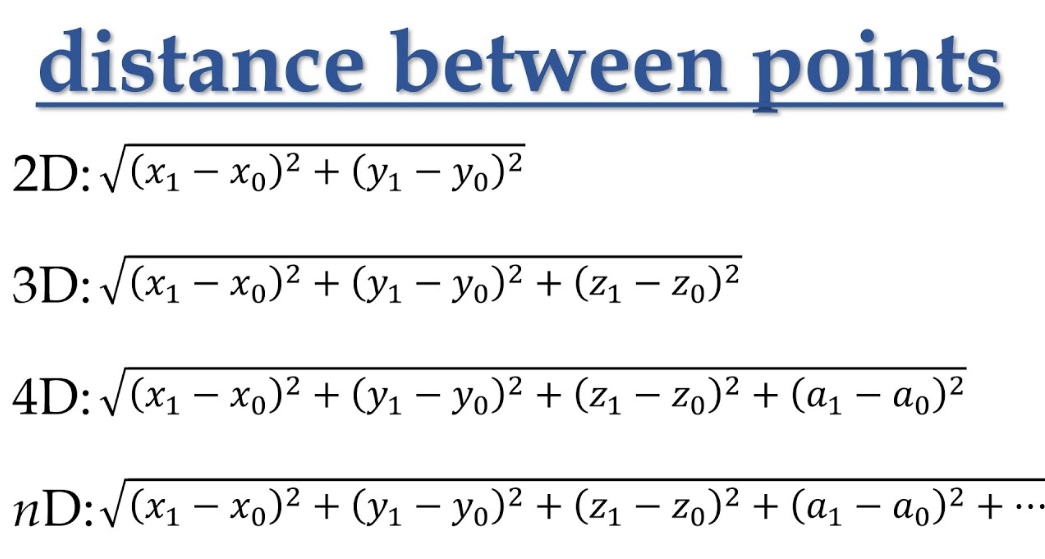

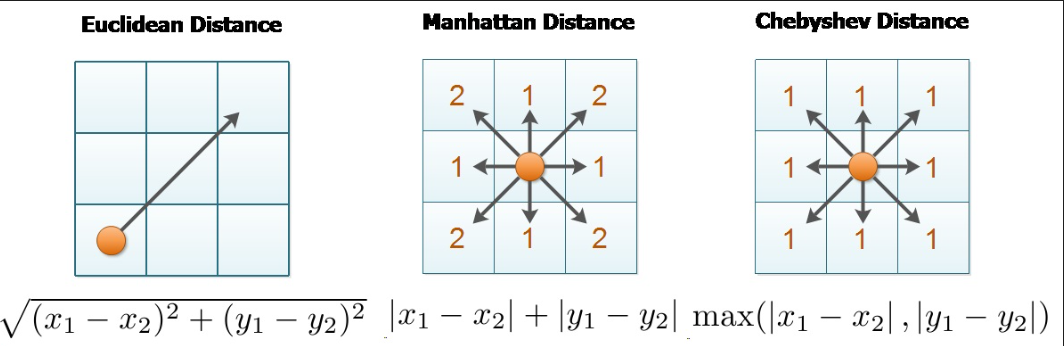

Euclidian VS Manhattan Distance

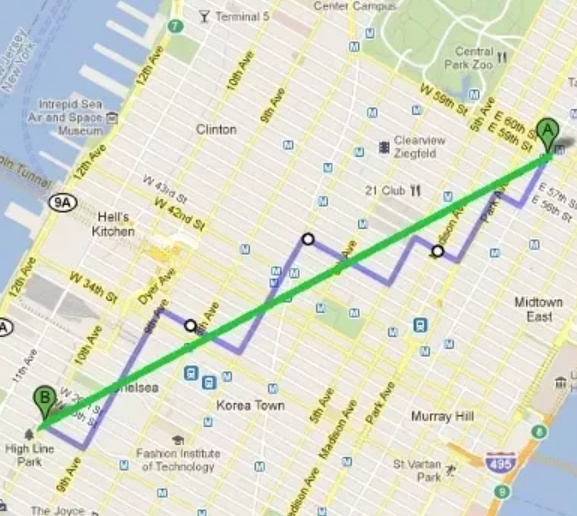

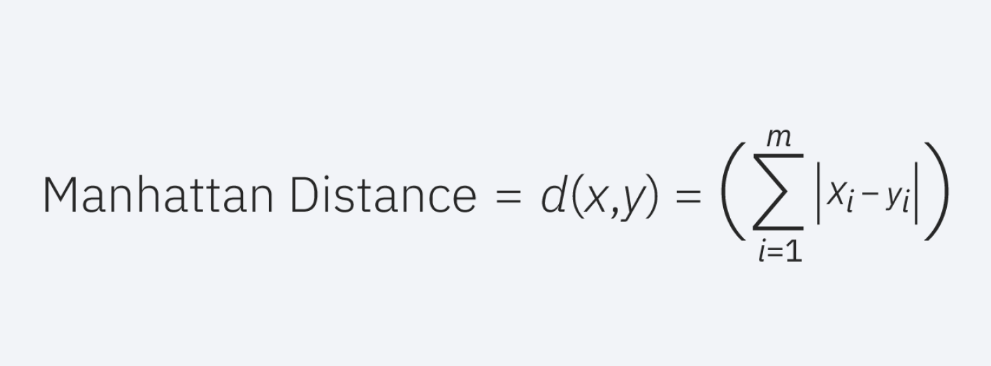

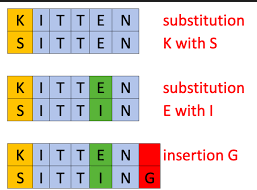

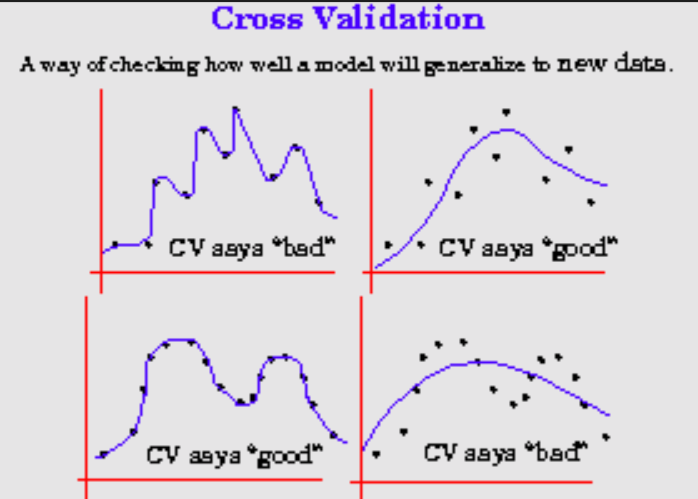

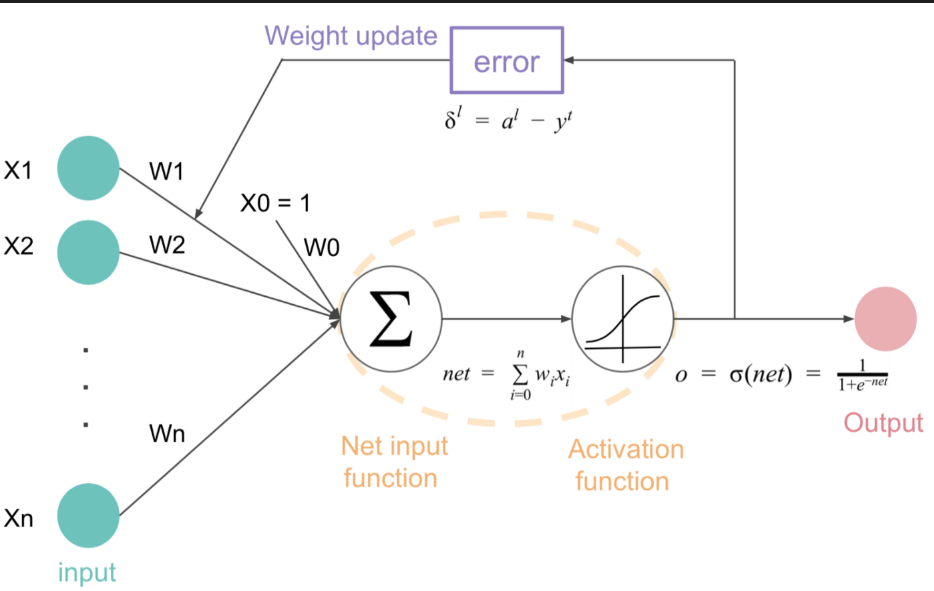

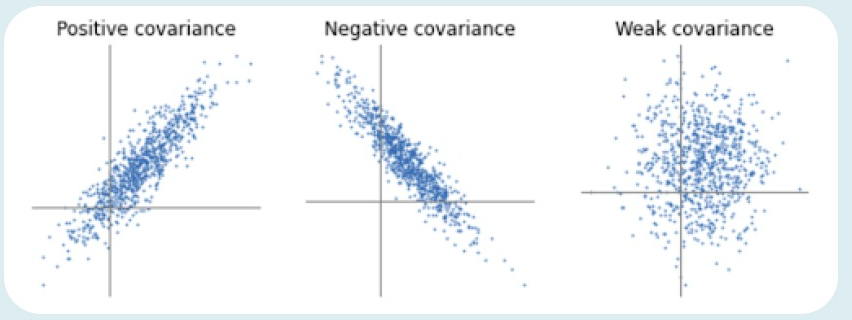

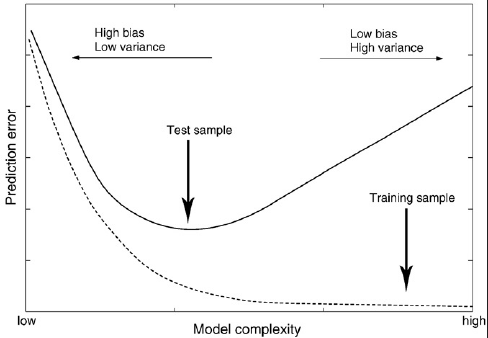

In [1]:
file = open("es_ES.dic", encoding="UTF-8")
texto = file.read()

# Creamos un string con los caracteres especiales que no deben tenerse en cuenta
limpiar = ",;:.¡!¿?-\"'"
for caracter in limpiar:
    texto = texto.replace(caracter, "")  # Remplazo los caracteres especiales por ""

texto = texto.replace("\n", " ")  # Reemplazo el salto de linea por " " para que no junte las palabras
texto = texto.lower()  # Se pasa el texto a minúsculas, para no tener palabras repetidas en el diccionario
palabras = texto.split(" ")  # Generamos una lista de palabras

# Contamos las palabras y las guardamos en un listado diccionario de palabras únicas
diccionario = {}
for palabra in palabras:
    if palabra in diccionario:
        diccionario[palabra] += 1
    else:
        diccionario[palabra] = 1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 20: invalid continuation byte

In [ ]:
#pip install levenshtein
import numpy

# Función para calcular la distancia Levinstein entre dos palabras
def levenshteinDistance(word1, word2):
    distances = numpy.zeros((len(word1) + 1, len(word2) + 1)) # Inicializo la matriz con ceros

    for w1 in range(len(word1) + 1): # Inicializo los valores de la primera fila
        distances[w1][0] = w1

    for w2 in range(len(word2) + 1): # Inicializo los valores de la primera columna
        distances[0][w2] = w2
    
    for w1 in range(1, len(word1) + 1): # Recorro la matriz calculando las distancias de las matrices de 2x2
        for w2 in range(1, len(word2) + 1):
            if (word1[w1-1] == word2[w2-1]): #si la letra es la misma, la distancia es el valor del vértice de la matriz
                distances[w1][w2] = distances[w1 - 1][w2 - 1]
            else: # si la letra es distinta, la distancia es el menor valor de los 3 más 1
                matrixValues = [distances[w1][w2 - 1],distances[w1 - 1][w2],distances[w1 - 1][w2 - 1]]
                matrixValues.sort()
                distances[w1][w2] = matrixValues[0] + 1

    return distances[len(word1)][len(word2)] # Retorna el valor de la última celda de la matriz

In [ ]:
# Función que recibe una palabra y un número, y devuelve la cantidad de palabras más cercanas al primer parámetro
def autocompleteDict(word, numWords):
    file = open('es_ES.dic', 'r' , encoding='latin-1')   # Leo el archivo del diccionario
    lines = file.readlines() 
    file.close()
    dictWordDist = []
    wordIdx = 0
    
    for line in lines: # Busca la distancia entre la palabra ingresada y las palabras del diccionario que empiezan por la misma letra 
        if line[0] == word[0]:
            wordDistance = levenshteinDistance(word, line[:line.find('/')].strip()) # Toma solo las palabras, sin el tipo y la compara
            dictWordDist.append(str(int(wordDistance)) + "-" + line[:line.find('/')].strip()) # Guarda la distancia y la palabra comparada 
            wordIdx = wordIdx + 1

    closestWords = []
    wordDetails = []
    currWordDist = 0
    dictWordDist.sort() # Ordena los resultados poniendo las palabras más cercanas primero
    for i in range(numWords): # Toma la cantidad de palabras ingresadas en el segundo parámetro
        currWordDist = dictWordDist[i]
        wordDetails = currWordDist.split("-")
        closestWords.append(wordDetails[1])
    return closestWords # Retorna la lista de palabras más cercanas

In [ ]:
print(autocompleteDict("abej", 3))